No. of features : 12
No. of rows : 545


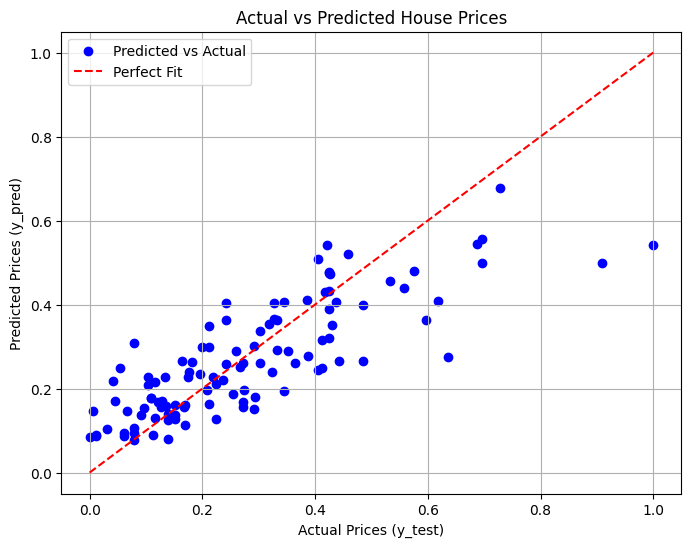


Coeficients : [0.29710819 0.03401493 0.28496552 0.10551251 0.03175967 0.02018587
 0.03403981 0.05955682 0.06801304 0.05863806 0.05453694 0.0364324 ]
Intercept : 0.00808261723432438
Predicted Values: 
Root Mean Squared Error (RMSE): 0.11524427850991448


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/Housing.csv'  # Update with your file path
data = pd.read_csv(file_path)
# Initialize the scaler
scaler = MinMaxScaler()

# Drop the 'No' (index) and 'X1 transaction date' columns
data_cleaned = data.dropna()
data_cleaned.replace({'yes' : 1 , 'no' : 0 , 'furnished' : 2 , 'semi-furnished' : 1 , 'unfurnished' : 0}, inplace=True)
data_cleaned = scaler.fit_transform(data_cleaned)
data_cleaned = pd.DataFrame(data_cleaned, columns=data.columns)

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['price'])  # Features
y = data_cleaned['price']  # Target (house price)
print("No. of features :" , X.shape[1])
print("No. of rows :" , X.shape[0])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plotting y_test vs y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit', linestyle='--')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"\nCoeficients : {model.coef_}")
print(f"Intercept : {model.intercept_}")
print(f"Root Mean Squared Error (RMSE): {mse**0.5}")